In [42]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import confusion_matrix


plt.rcParams['font.size'] = 12

df = pd.read_csv('build/training_data.csv')
lbl = df['label']
df = df.drop(columns='label')

Xtrain,Xtest, ytrain, ytest = train_test_split(df, lbl, test_size = 0.3, random_state = 555)
df

cols = Xtrain.columns

scaler = RobustScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

Xtrain = pd.DataFrame(Xtrain, columns=[cols])
Xtest = pd.DataFrame(Xtest, columns=[cols])
Xtrain.head()

,LineFit_TTParams.lf_vel_z,HitStatisticsValues.max_pulse_time,SplineMPEFitParams.rlogl,HitStatisticsValues.z_travel,SplineMPEDirectHitsA.n_dir_strings,LineFit_TT.zenith,NewAtt.DeltaZd,MuEXAngular4.zenith,NewAtt.SplineVerRadius,SplineMPEDirectHitsA.n_dir_doms,...,MPEFitParaboloid.zenith,SplineMPETruncatedEnergy_SPICEMie_AllBINS_MuEres.value,MPEFitParaboloidFitParams.zenith,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value,SPEFit2Bayesian.z,SplineMPECharacteristics.track_hits_separation_length,SplineMPEDirectHitsC.n_dir_doms,LineFit_TTParams.lf_vel,HitStatisticsValues.z_min,MPEFitParaboloidFitParams.err1
0,-0.149118,1.373349,1.962738,-0.320388,-0.5,-0.167988,0.228157,-0.312130,-0.093043,-0.666667,...,-0.240372,0.613575,-0.241391,0.417655,0.341134,-0.761229,-0.4,-0.452796,0.420603,1.964046
1,1.078592,0.793086,0.694196,2.908549,-0.5,1.327643,0.202832,1.490469,0.597893,-0.666667,...,1.464812,0.000000,1.464587,0.000000,0.396157,0.834750,-0.4,-0.594647,-0.144543,-0.020511
2,-0.274077,-0.645194,0.578448,-0.328365,0.5,-0.289647,0.255647,-0.222714,0.747698,0.666667,...,-0.209236,0.613575,-0.210240,0.417655,0.758988,-0.001854,0.2,-0.429162,0.649632,0.112234
3,-0.270140,1.091436,-0.315378,-0.460970,-1.0,-0.274105,-0.470000,-0.371428,-0.109992,-1.000000,...,-0.460136,-1.024089,-0.461257,-0.796593,0.606655,2.284443,-0.2,0.394391,0.589450,-0.302649
4,-0.324825,0.006541,-0.081001,-0.486130,-0.5,-0.329588,0.860658,-0.456157,0.394289,0.000000,...,-0.280400,-0.386425,-0.281437,-0.170974,0.622103,0.317414,-0.4,-0.076872,0.610815,0.839229


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [15]:
from sklearn.metrics import accuracy_score

ypred2 = knn.predict(Xtest)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred2)))

Model accuracy score: 0.9347


In [16]:
ypred2train = knn.predict(Xtrain)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, ypred2train)))

Training-set accuracy score: 0.9645


In [17]:
# the model with k=5
knn5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn5.fit(Xtrain, ytrain)


# predict on the test-set
ypred5 = knn5.predict(Xtest)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(ytest, ypred5)))

Model accuracy score with k=5 : 0.9375


In [18]:
# the model with k=6
knn6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn6.fit(Xtrain, ytrain)


# predict on the test-set
ypred6 = knn6.predict(Xtest)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(ytest, ypred6)))

Model accuracy score with k=6 : 0.9363


In [19]:
# the model with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn7.fit(Xtrain, ytrain)


# predict on the test-set
ypred7 = knn7.predict(Xtest)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(ytest, ypred7)))

Model accuracy score with k=7 : 0.9389


In [20]:
# the model with k=8
knn8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn8.fit(Xtrain, ytrain)


# predict on the test-set
ypred8 = knn8.predict(Xtest)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(ytest, ypred8)))

Model accuracy score with k=8 : 0.9376


In [21]:
# The Confusion Matrix with k=8

cm = confusion_matrix(ytest, ypred8)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5143  203]
 [ 464 4886]]

True Positives(TP) =  5143

True Negatives(TN) =  4886

False Positives(FP) =  203

False Negatives(FN) =  464


In [25]:
knn.predict_proba(Xtest)[:,0]

array([0.        , 1.        , 0.        , ..., 0.66666667, 1.        ,
       1.        ])

In [26]:
knn.predict_proba(Xtest)[:,1]

array([1.        , 0.        , 1.        , ..., 0.33333333, 0.        ,
       0.        ])

Text(0, 0.5, 'Frequency')

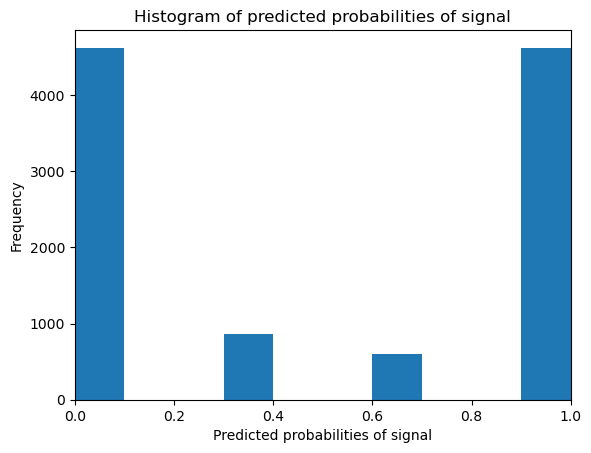

In [28]:
ypredknn = knn.predict_proba(Xtest)[:, 1]

plt.hist(ypredknn, bins = 10)
plt.title('Histogram of predicted probabilities of signal')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of signal')
plt.ylabel('Frequency')

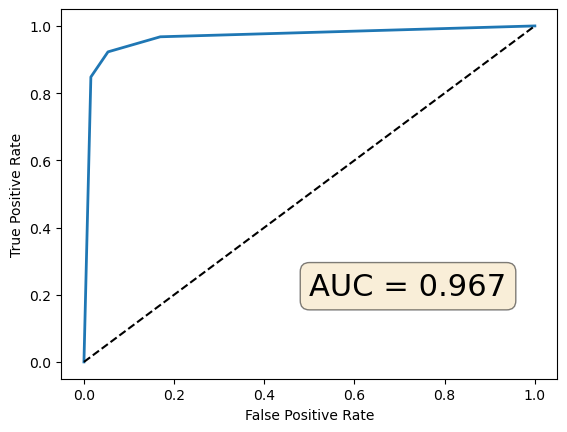

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(ytest, ypredknn)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12


AUC = metrics.roc_auc_score(ytest, ypredknn)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.5, 0.2, f'AUC = {np.round(AUC, 3)}', fontsize = 22, bbox = props)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('build/KNNRoc.pdf')

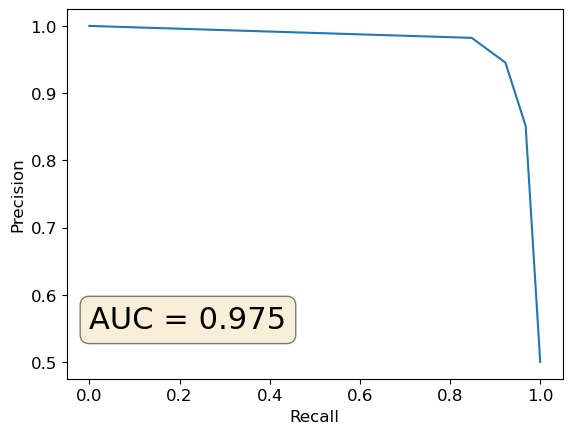

In [53]:
#Calc Precision Recall curve
prec, rec, thresh = metrics.precision_recall_curve(ytest, ypredknn)

prcauc = np.sum((rec[:-1]-rec[1:])*(prec[1:]+prec[:-1])/2)

plt.text(0.0, 0.55, f'AUC = {np.round(prcauc, 3)}', fontsize = 22, bbox = props)

plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.savefig('build/KNNPRC.pdf')

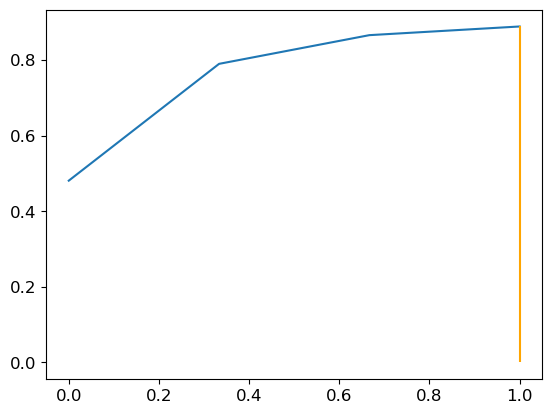

In [32]:
#Find Threshold with fbeta score
def fbeta(p, r, beta = 0.1):
    return (1+beta**2)*(p*r)/(beta*p+r)

fb = fbeta(prec, rec)[:-1]
argTr = np.argmax(fb)
plt.plot(thresh, fb)
plt.vlines(thresh[argTr], 0, fb[argTr], color = 'orange', label = 'peak')
plt.savefig('build/KNNFbeta.pdf')

In [41]:
#save ROC,AUC and fbeta curve to disk
file = open('build/KNNPRC.txt', 'w')
file.write('#Precision Recal fb thresh\n')
for f, t,b, tr in zip(prec[:-1], rec[:-1], fb, thresh):
    file.write(f'{f} {t} {b} {tr}\n')
file.close()

In [38]:
#save ROC,AUC curve to disk
file = open('build/KNNRoc.txt', 'w')
file.write('#fpr tpr\n')
for f, t in zip(fpr, tpr):
    file.write(f'{f} {t}\n')
file.write(f'-1 {AUC}')
file.close()